## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [26]:

def build_mlp(input_shape, output_shape=10, nero_nums=[256,128,64,32], drop_ration = 0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, unit in enumerate(nero_nums):
        if i==0:
            x = keras.layers.Dense(units=unit, activation='relu', name='hidden_layer'+str(i+1))(input_layer)
            x = keras.layers.Dropout(drop_ration)(x)
        else:
            x = keras.layers.Dense(units=unit, activation='relu', name='hidden_layer'+str(i+1))(x)
            x = keras.layers.Dropout(drop_ration)(x)
    out = keras.layers.Dense(units=output_shape, activation='softmax')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [27]:
"""Code Here
設定超參數
"""
lr = 0.01
EPOCHS = 10
BATCH_SIZE = 256
momentum = 0.5
Dropout_EXP=0.25

In [19]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

model = build_mlp(input_shape=x_train.shape[1:], drop_ration=Dropout_EXP)
model.summary()
optimizer = keras.optimizers.Adam()
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

W0723 23:32:20.996792  6792 deprecation.py:323] From C:\Users\user1\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0723 23:32:21.047796  6792 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer4 (Dense)        (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 830,250
Trainable params: 830,250
Non-trainable params: 0
_________________________________________________________________
Trai

In [22]:
results['normal'] = {
    'train_loss':model.history.history['loss'],
    'val_loss':model.history.history['val_loss'],
    'train_acc':model.history.history['acc'],
    'val_acc':model.history.history['val_acc']
}

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.figure(figsize=(8,6))
    for i, cond in enumerate(history.keys()):
        plt.plot(range(len(history[cond]['train_loss'])), history[cond]['train_loss'], '-', label=cond)
        plt.plot(range(len(history[cond]['val_loss'])), history[cond]['val_loss'], '--', label=cond)
    
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(8,6))
    for i, cond in enumerate(history.keys()):
        plt.plot(range(len(history[cond]['train_acc'])), history[cond]['train_acc'], '-', label=cond)
        plt.plot(range(len(history[cond]['val_acc'])), history[cond]['val_acc'], '--', label=cond)
    
    plt.title("Accuracy")
    plt.legend()
    plt.show()


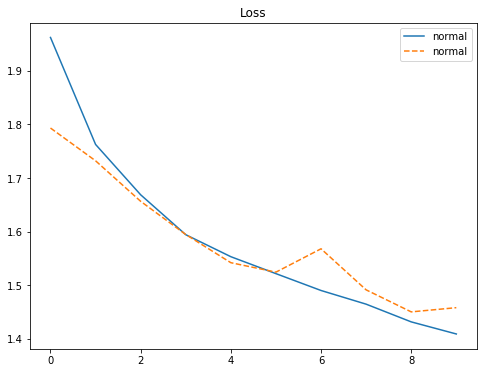

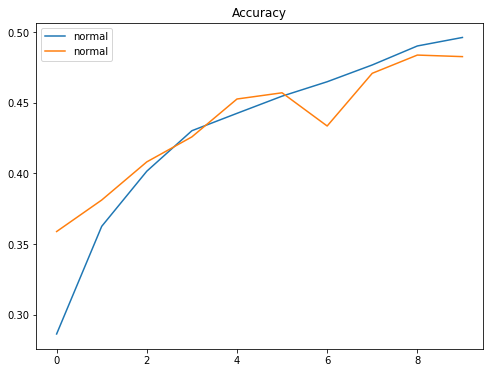

In [25]:
show_history(results)

In [30]:
model_with_drop = build_mlp(input_shape=x_train.shape[1:], drop_ration=Dropout_EXP)
model_with_drop.summary()
optimizer = keras.optimizers.Adam()
model_with_drop.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model_with_drop.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model_with_drop.history.history["loss"]
valid_loss = model_with_drop.history.history["val_loss"]
train_acc = model_with_drop.history.history["acc"]
valid_acc = model_with_drop.history.history["val_acc"]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                8256      
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
__________

In [35]:
results['drop:0.25'] = {
    'train_loss':model_with_drop.history.history['loss'],
    'val_loss':model_with_drop.history.history['val_loss'],
    'train_acc':model_with_drop.history.history['acc'],
    'val_acc':model_with_drop.history.history['val_acc']
}

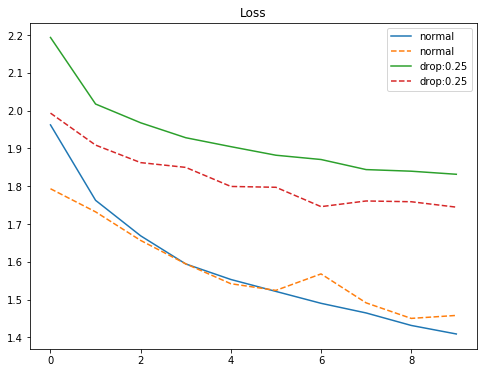

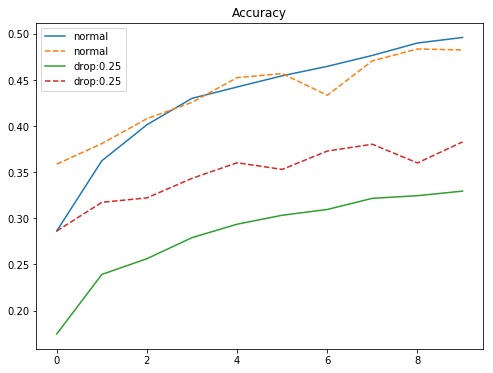

In [36]:
show_history(results)

In [38]:
def build_mlp_v2 (input_shape, output_units=10, num_neurons=[256,128,64,32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
           
    x = BatchNormalization()(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [39]:
model_with_batch_norm = build_mlp(input_shape=x_train.shape[1:], drop_ration=Dropout_EXP)
model_with_batch_norm.summary()
optimizer = keras.optimizers.Adam()
model_with_batch_norm.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model_with_batch_norm.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                8256      
_________________________________________________________________
dropout_15 (Dropout)         (None, 64)                0         
__________

In [40]:
results['batch_norm'] = {
    'train_loss':model_with_batch_norm.history.history['loss'],
    'val_loss':model_with_batch_norm.history.history['val_loss'],
    'train_acc':model_with_batch_norm.history.history['acc'],
    'val_acc':model_with_batch_norm.history.history['val_acc']
}

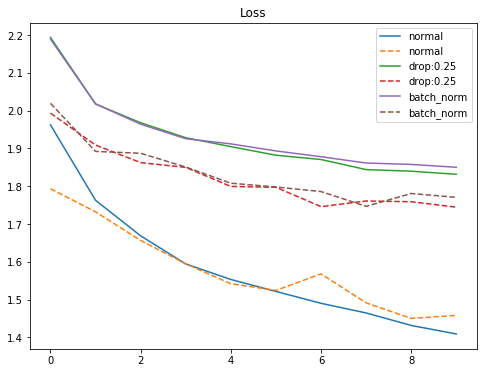

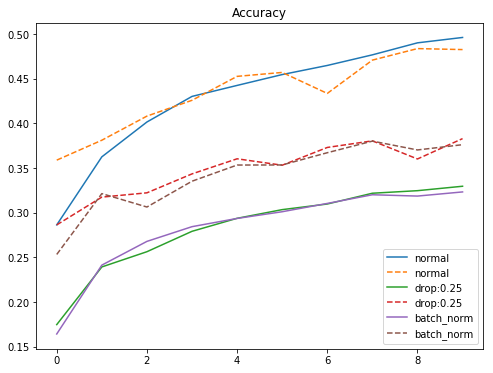

In [41]:
show_history(results)

In [42]:
def build_mlp_v3 (input_shape, output_units=10, num_neurons=[256,128,64,32], drop_ratio = 0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = keras.layers.Dropout(drop_ration)(x)
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = keras.layers.Dropout(drop_ration)(x)
           
    x = BatchNormalization()(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [43]:
model_with_batch_norm_drop = build_mlp(input_shape=x_train.shape[1:], drop_ration=Dropout_EXP)
model_with_batch_norm_drop.summary()
optimizer = keras.optimizers.Adam()
model_with_batch_norm_drop.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model_with_batch_norm_drop.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_18 (Dropout)         (None, 128)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                8256      
_________________________________________________________________
dropout_19 (Dropout)         (None, 64)                0         
__________

In [44]:
results['batch_norm_drop'] = {
    'train_loss':model_with_batch_norm_drop.history.history['loss'],
    'val_loss':model_with_batch_norm_drop.history.history['val_loss'],
    'train_acc':model_with_batch_norm_drop.history.history['acc'],
    'val_acc':model_with_batch_norm_drop.history.history['val_acc']
}

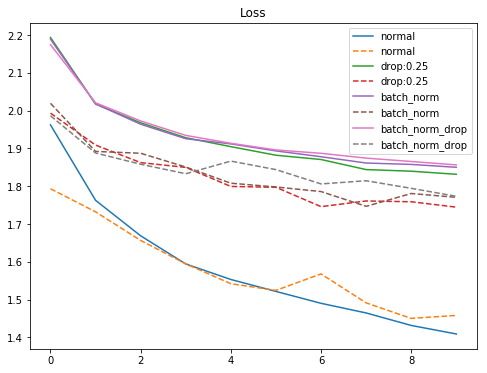

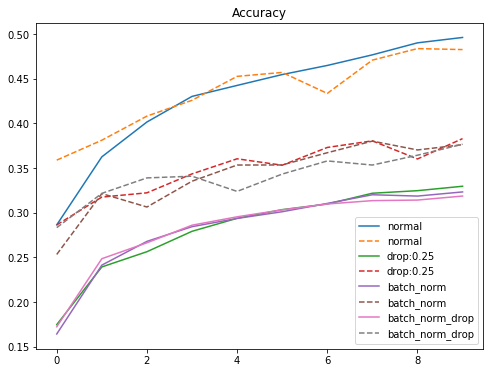

In [45]:
show_history(results)